# CHAPTER 2 - The Tools of the Trade in Quantum Computing - Qiskit Code

*Note*: You may skip the following two cells if you have alredy installed the right versions of all the libraries mentioned in *Appendix D*. This will likely NOT be the case if you are running this notebook on a cloud service such as Google Colab.

In [1]:
pip install qiskit==0.39.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pylatexenc==2.10

Note: you may need to restart the kernel to use updated packages.


In [1]:
from qiskit import *

In [3]:
qreg1 = QuantumRegister(size = 2, name = "qrg1")
qreg2 = QuantumRegister(1, "qrg2")
creg = ClassicalRegister(1, "oldschool")

qc = QuantumCircuit(qreg1, creg, qreg2)


In [5]:
qc.draw()

qrg1_0: 
             
     qrg1_1: 
             
       qrg2: 
             
oldschool: 1/

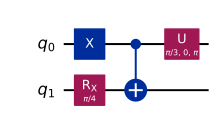

In [6]:
import numpy as np

qc = QuantumCircuit(2) # Initialise the circuit.

# We can now apply the gates sequentially.
qc.x(0)
qc.rx(np.pi/4, 1)
qc.cx(0, 1)
qc.u(np.pi/3, 0, np.pi, 0)

qc.draw("mpl")

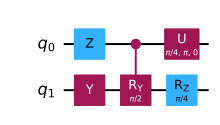

In [7]:
## Exercicios 2.2 pag 75

qc = QuantumCircuit(2) # Initialise the circuit.

# We can now apply the gates sequentially.
qc.z(0)
qc.y(1)
qc.cry(np.pi/2, 0, 1)
qc.u(np.pi/4, np.pi, 0, 0)
qc.rz(np.pi/4, 1)

qc.draw("mpl")

In [12]:
#from qiskit.providers.aer import AerSimulator
from qiskit_aer import AerSimulator

In [15]:
sim = AerSimulator()
sim_GPU = AerSimulator(device = 'GPU')

In [26]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.measure(range(2), range(2))

# A linha abaixo nao funfa com a verao 1.0 do qiskit
# Foi substituida pelas linhas seguintes logo abaixo
#job = execute(qc, sim, shots = 1024)

## Adaptacao abaixo para rodar com a nova versao do qiskit, substituindo as linha anterior.
qc_novo = transpile(qc, sim)
job = sim.run(qc_novo)

result = job.result()
counts = result.get_counts()
print(counts)

{'00': 517, '01': 507}


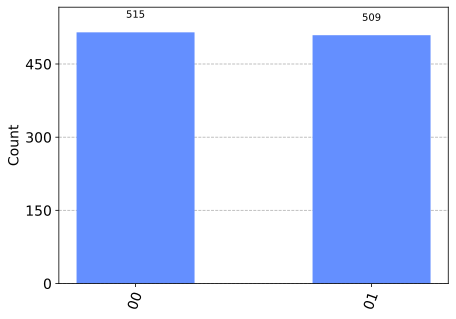

In [25]:
from qiskit.visualization import *
plot_histogram(counts)

In [34]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.save_statevector()
qc.measure(0,0)
qc.measure(1,1)

# A linha abaixo nao funfam com a verao 1.0 do qiskit
# Foi substituida pelas linhas seguintes logo abaixo
#result = execute(qc, sim, shots = 1024).result()

## Adaptacao abaixo para rodar com a nova versao do qiskit, substituindo a linha anterior.
qc_novo = transpile(qc, sim)
result = sim.run(qc_novo).result()

sv = result.get_statevector()
print(sv)
counts = result.get_counts()
print(counts)

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))
{'01': 506, '00': 518}


In [35]:
sim_u = AerSimulator(method = 'unitary')

qc = QuantumCircuit(1)
qc.h(0)
qc.save_unitary()

# A linha abaixo nao funfam com a verao 1.0 do qiskit
# Foi substituida pelas linhas seguintes logo abaixo
#result = execute(qc, sim_u).result()

## Adaptacao abaixo para rodar com a nova versao do qiskit, substituindo a linha anterior.
qc_novo = transpile(qc, sim)
result = sim.run(qc_novo).result()
 

U = result.get_unitary(decimals = 4)
print(U)

Operator([[ 0.7071+0.j,  0.7071-0.j],
          [ 0.7071+0.j, -0.7071+0.j]],
         input_dims=(2,), output_dims=(2,))


*Note*: In the following cell, you need to replace "1234" with your actual IBM token. Refer to *Appendix D* in the book for instructions on how to create an account and get your token. Be very careful not to disclose your token to anyone!

In [64]:
from qiskit_ibm_runtime import QiskitRuntimeService
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

ibm_token="1234"

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token=ibm_token, set_as_default=True, overwrite=True, verify=False) 
# Load saved credentials
service = QiskitRuntimeService()
#IBMQ.save_account(ibm_token)

/home/furtado/anaconda3/envs/qmlPraticalOptMaisAtual/lib/python3.9/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'auth.quantum-computing.ibm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/furtado/anaconda3/envs/qmlPraticalOptMaisAtual/lib/python3.9/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'auth.quantum-computing.ibm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/furtado/anaconda3/envs/qmlPraticalOptMaisAtual/lib/python3.9/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'auth.quantum-computing.ibm.com'. Adding certificate verification is strongly advi

In [65]:
#provider = IBMQ.load_account()
#print(provider.backends(simulator = False))
print(service.backend())

/home/furtado/anaconda3/envs/qmlPraticalOptMaisAtual/lib/python3.9/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.quantum.ibm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/furtado/anaconda3/envs/qmlPraticalOptMaisAtual/lib/python3.9/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.quantum.ibm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/furtado/anaconda3/envs/qmlPraticalOptMaisAtual/lib/python3.9/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.quantum.ibm.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthe

<IBMBackend('simulator_stabilizer')>


In [61]:
#dev_list = provider.backends(
#    filters = lambda x: x.configuration().n_qubits >= 5,
#    simulator = False)

dev_list = service.backends(
    filters = lambda x: x.configuration().n_qubits >= 5,
    simulator = False)

In [62]:
#from qiskit.providers.ibmq import *
#dev = least_busy(dev_list)
print(dev_list)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>]


In [72]:
#from qiskit.providers.ibmq.job import job_monitor
from qiskit_ibm_provider.job import job_monitor

# Let us set up a simple circuit.
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

# First, we run the circuit using the statevector simulator.
sim = AerSimulator()

# A linha abaixo nao funfam com a verao 1.0 do qiskit
# Foi substituida pelas linhas seguintes logo abaixo
#result = execute(qc, sim, shots = 1024).result()

## Adaptacao abaixo para rodar com a nova versao do qiskit, substituindo a linha anterior.
qc_novo = transpile(qc, sim)
result = sim.run(qc_novo).result()
counts_sim = result.get_counts()

# Now we run it on the real device that we selected before.
# A linha abaixo nao funfam com a verao 1.0 do qiskit
# Foi substituida pelas linhas seguintes logo abaixo
#job = execute(qc, dev, shots = 1024)

## Adaptacao abaixo para rodar com a nova versao do qiskit, substituindo a linha anterior.
qc_novo = transpile(qc, sim)
job = sim.run(qc_novo)

job_monitor(job)
result = job.result()
counts_dev = result.get_counts()

Job Status: job has successfully run


In [73]:
print(counts_sim)
print(counts_dev)

{'00': 519, '11': 505}
{'11': 549, '00': 475}
